<a href="https://colab.research.google.com/github/ManuSanchez02/7506R-2c2022-GRUPO09/blob/main/tp2/7506_R_TP2_GRUPO09_ENTREGA_N3(Ensambles).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas necesarias

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from joblib import dump, load 

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline 
from sklearn.metrics import r2_score
from sklearn import metrics

np.random.seed(1)

In [4]:
dataset_train_clasificacion = pd.read_csv("https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/blob/main/tp2/DatasetTrainClasificacion.csv?raw=true")
dataset_test_clasificacion = pd.read_csv("https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/blob/main/tp2/DatasetTestClasificacion.csv?raw=true")

dataset_train_regresion = pd.read_csv("https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/blob/main/tp2/DatasetTrainRegresion.csv?raw=true")
dataset_test_regresion = pd.read_csv("https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/blob/main/tp2/DatasetTestRegresion.csv?raw=true")

In [5]:
y_train_clasificacion_categorico = pd.read_csv("https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/blob/main/tp2/clasificacion_target_train.csv?raw=true")
y_test_clasificacion_categorico = pd.read_csv("https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/blob/main/tp2/clasificacion_target_test.csv?raw=true")

y_train_regresion = pd.read_csv("https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/blob/main/tp2/regresion_target_train.csv?raw=true")
y_test_regresion = pd.read_csv("https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/blob/main/tp2/regresion_target_test.csv?raw=true")

y_train_clasificacion_categorico.drop("Unnamed: 0", axis = 1, inplace=True)
y_test_clasificacion_categorico.drop("Unnamed: 0", axis = 1, inplace=True)
y_train_regresion.drop("Unnamed: 0", axis = 1, inplace=True)
y_test_regresion.drop("Unnamed: 0", axis = 1, inplace=True)

Convertimos las categorías del target de clasificacion en categorías numéricas

In [23]:
le = preprocessing.LabelEncoder()
y_train_clasificacion = le.fit_transform(y_train_clasificacion_categorico)
y_test_clasificacion = le.transform(y_test_clasificacion_categorico)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Importamos los modelos utilizados en el T1

In [16]:
!wget https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/raw/main/tp2/arbolDeDecision.joblib -O arbol_de_decision.joblib
!wget https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/raw/main/tp2/randomForest.joblib -O random_forest.joblib
!wget https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/raw/main/tp2/regresionLogistica.joblib -O regresion_logistica.joblib
!wget https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/raw/main/tp2/regresionLinealComparador.joblib -O regresion_lineal.joblib
!wget https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/raw/main/tp2/knn.joblib -O knn.joblib
!wget https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/raw/main/tp2/xgb.joblib -O xgb.joblib
!wget https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/raw/main/tp2/gradientBoosting.joblib -O gradient_boosting.joblib

--2022-11-16 20:23:25--  https://github.com/ManuSanchez02/7506R-2c2022-GRUPO09/raw/main/tp2/arbolDeDecision.joblib
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ManuSanchez02/7506R-2c2022-GRUPO09/main/tp2/arbolDeDecision.joblib [following]
--2022-11-16 20:23:25--  https://raw.githubusercontent.com/ManuSanchez02/7506R-2c2022-GRUPO09/main/tp2/arbolDeDecision.joblib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 908544 (887K) [application/octet-stream]
Saving to: ‘arbol_de_decision.joblib’

arbol_de_decision.j 100%[===================>] 887.25K  --.-KB/s    in 0.05s   

2022-11-16 20:23:25 (15

In [20]:
# Modelos clasificación
arbol_de_decision = load("arbol_de_decision.joblib")
random_forest = load("random_forest.joblib")
regresion_logistica = load("regresion_logistica.joblib")

# Modelos regresión
regresion_lineal = load("regresion_lineal.joblib")
knn = load("knn.joblib")
xgboost = load("xgb.joblib")
gradient_boost = load("gradient_boosting.joblib")

[20:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Votación para clasificación

Creamos ensamble de votación

In [35]:
regresion_logistica_escalado = Pipeline([("ss", StandardScaler()), ("rl", regresion_logistica)])

In [40]:
#vot_clf = VotingClassifier(estimators = [('add', arbol_de_decision), ('rf', random_forest), ('rl', regresion_logistica)], voting = 'soft') Score 0.66
#vot_clf = VotingClassifier(estimators = [('add', arbol_de_decision), ('rf', random_forest)], voting = 'soft') Score 0.64
#vot_clf = VotingClassifier(estimators = [('add', arbol_de_decision), ('rf', random_forest), ('rle', regresion_logistica_escalado)], voting = 'soft') #Score 0.65
#vot_clf = VotingClassifier(estimators = [('add', arbol_de_decision), ('rf', random_forest), ('rle', regresion_logistica_escalado)], voting = 'hard') #Score 0.65

Entrenamos el modelo

In [41]:
vot_clf.fit(dataset_train_clasificacion, y_train_clasificacion)

VotingClassifier(estimators=[('add',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=900,
                                                     min_samples_leaf=8,
                                                     random_state=0)),
                             ('rf',
                              RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                                 estimator=RandomForestClassifier(),
                                                 n_iter=5,
                                                 param_distributions={'criterion': ['gini',
                                                                                    'entropy'],
                                                                      'min_samples_leaf': [1,
                                                                                           2,
      

Evaluamos en el conjunto de test

In [31]:
outputs = {
    "bajo": 0,
    "medio": 1,
    "alto": 2,
}

El score es:  0.6470485808810726


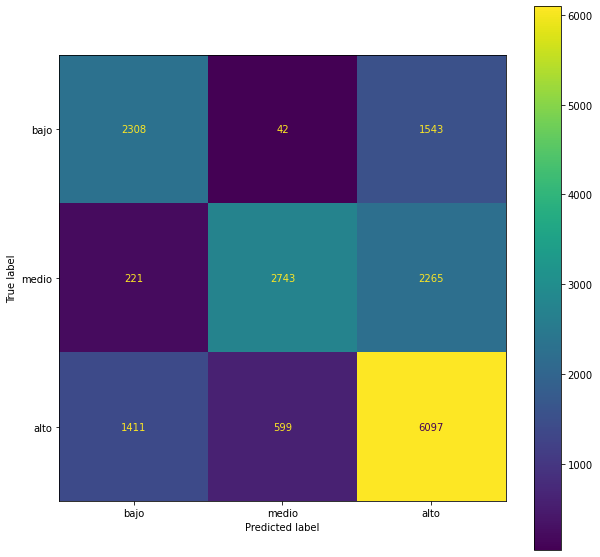

In [42]:
y_pred = vot_clf.predict(dataset_test_clasificacion)
print("El score es: ", accuracy_score(y_test_clasificacion, y_pred))

# Matriz de confusión
fig, ax = plt.subplots(1,1,figsize=(10,10))
dsp = ConfusionMatrixDisplay.from_predictions(y_test_clasificacion,y_pred, display_labels=outputs.keys(),ax=ax)

### Stacking para regresión

In [47]:
# Modelos Base
base_models = [('knn', knn),
               ('xgb', xgboost),
               ('gb', gradient_boost)]

# Creamos el ensamble
stacking_model = StackingRegressor(estimators=base_models, 
                                    final_estimator=regresion_lineal, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

Entrenamos el modelo de stacking

In [48]:
stacking_model.fit(dataset_train_regresion, y_train_regresion)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[21:11:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[21:14:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


StackingRegressor(cv=5,
                  estimators=[('knn',
                               KNeighborsRegressor(n_neighbors=19,
                                                   weights='distance')),
                              ('xgb',
                               XGBRegressor(learning_rate=0.07, max_depth=12,
                                            min_child_weight=6, missing=nan,
                                            n_estimators=500)),
                              ('gb',
                               GradientBoostingRegressor(learning_rate=0.625,
                                                         max_depth=6,
                                                         n_estimators=65,
                                                         random_state=0))],
                  final_estimator=LinearRegression(), passthrough=True,
                  verbose=2)

Medimos la performance

In [51]:
def imprimir_metricas_regresion(target_test, precios_predichos):
    # Mean Square Error
    mse = metrics.mean_squared_error(
        y_true=target_test, y_pred=precios_predichos, squared=True
    )

    print(f"El error (mse) de test es: {mse}")

    # Root Mean Square Error
    rmse = metrics.mean_squared_error(
        y_true=target_test, y_pred=precios_predichos, squared=False
    )

    print(f"El error (rmse) de test es: {rmse}")

    r2 = r2_score(target_test, precios_predichos)
    print(f"El score R2 es: {r2}")
  
y_pred_regresion = stacking_model.predict(dataset_test_regresion)

imprimir_metricas_regresion(y_test_regresion, y_pred_regresion)


El error (mse) de test es: 2179735848.27748
El error (rmse) de test es: 46687.641279866344
El score R2 es: 0.7948085081456135
